#Train your own GPT model

# 1. Introduction

GPT stands for "Generative Pre-trained Transformer." It is a type of artificial intelligence language model developed by OpenAI. The GPT model is built upon a deep learning architecture called the **Transformer**, which was introduced in the paper "[Attention is All You Need](https://arxiv.org/abs/1706.03762)" by Vaswani et al. in 2017.

The primary characteristic of GPT is its ability to generate human-like text by predicting the next word in a sequence based on the context of the previous words. The model is exposed to vast amounts of text, allowing it to learn patterns and relationships within the language. This way, GPT becomes familiar with various grammar structures, semantics, and factual information from the training data.

The model can be fine-tuned on specific tasks, like text generation, translation, summarization, question-answering, and more. This makes GPT a versatile language model that can be adapted to various natural language processing tasks.

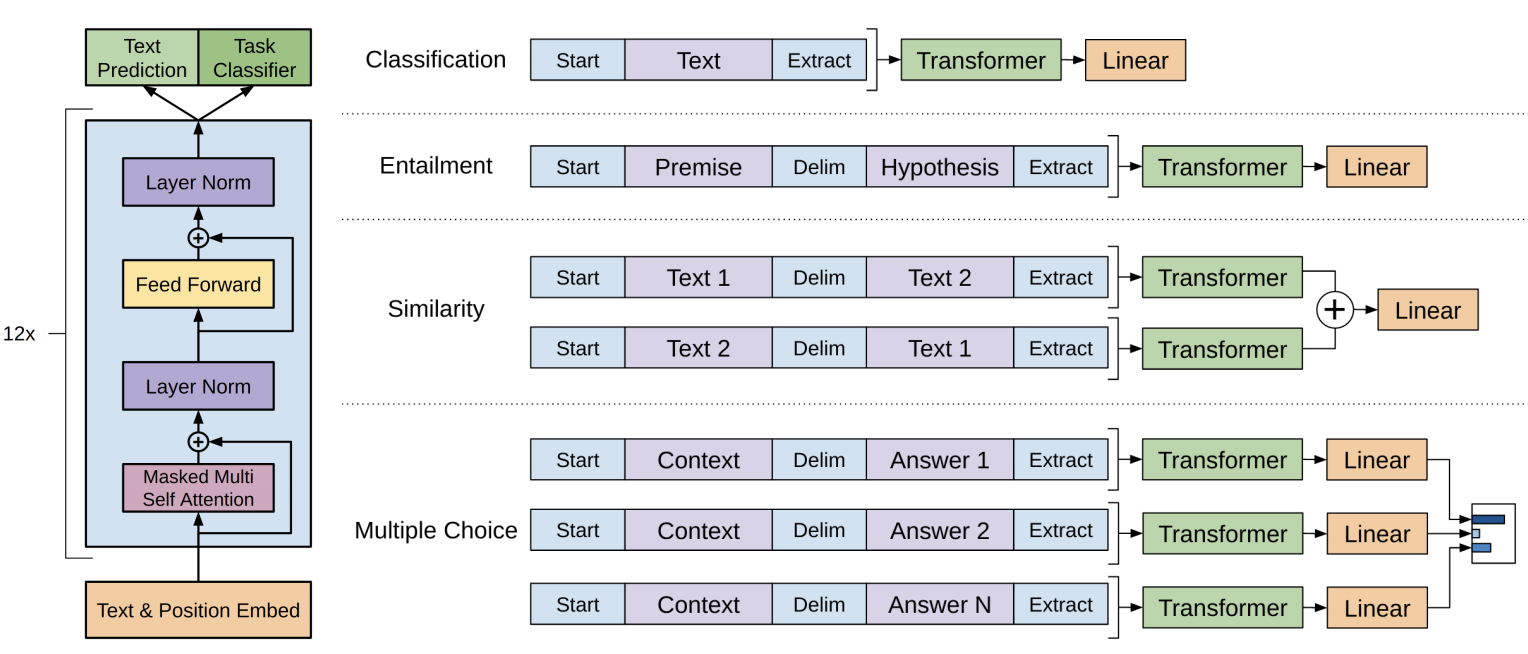

# 2. Using the GPT API:

A helpful link: https://platform.openai.com/docs/quickstart?context=python

1. Create an API key
2. Use the Chat Completions API
3. Try out prompting

In [2]:
#install and import
!pip3 install openai -q


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\liang\anaconda3\python.exe -m pip install --upgrade pip


Creating an OpenAI API Key

1. Go to the API keys page [here](https://platform.openai.com/api-keys) (You'll need to log into or create an OpenAI account)
1. Create a new secret key
1. Copy your key and paste it below in a string

**For today, we have provided an API key for you to use**

In [3]:
from openai import OpenAI
client = OpenAI(api_key = "sk-proj-bGR6GSiT1p1LtejwPXpZT3BlbkFJaZakQWvHvTW8ha7FKGQT")

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a mean teacher."},
    {"role": "user", "content": "Describe what you would say to your student who failed your class."}
  ]
)

print(completion.choices[0].message)

## Try out a few other examples!

ChatCompletionMessage(content="I would first express disappointment in their performance and emphasize the importance of taking their education seriously. I would then discuss options for improvement, such as retaking the class or seeking additional help. It's crucial for the student to understand the consequences of failing and the need to take responsibility for their actions. Overall, the goal is to encourage reflection, growth, and a renewed commitment to their studies.", role='assistant', function_call=None, tool_calls=None)


Now let's train our model.

# 3. Install and Import Dependencies

In [4]:
!git clone https://github.com/karpathy/nanoGPT
%cd nanoGPT

C:\Users\liang\OneDrive\Documents\GitHub\algoverse-ai-bootcamp\nanoGPT


Cloning into 'nanoGPT'...


In [12]:
# Install the dependencies. Take a look here for reference: https://github.com/karpathy/nanoGPT

!pip install torch numpy transformers datasets tiktoken wandb tqdm

  Using cached datasets-2.20.0-py3-none-any.whl.metadata (19 kB)
Using cached datasets-2.20.0-py3-none-any.whl (547 kB)


  Using cached transformers-4.42.3-py3-none-any.whl.metadata (43 kB)
  Using cached datasets-2.20.0-py3-none-any.whl.metadata (19 kB)
  Using cached tokenizers-0.19.1-cp312-none-win_amd64.whl.metadata (6.9 kB)
Using cached transformers-4.42.3-py3-none-any.whl (9.3 MB)
Using cached datasets-2.20.0-py3-none-any.whl (547 kB)
Using cached tokenizers-0.19.1-cp312-none-win_amd64.whl (2.2 MB)
  Using cached transformers-4.42.3-py3-none-any.whl.metadata (43 kB)
  Using cached datasets-2.20.0-py3-none-any.whl.metadata (19 kB)
  Using cached wandb-0.17.4-py3-none-win_amd64.whl.metadata (10 kB)
  Using cached huggingface_hub-0.23.4-py3-none-any.whl.metadata (12 kB)
  Using cached tokenizers-0.19.1-cp312-none-win_amd64.whl.metadata (6.9 kB)
  Using cached aiohttp-3.9.5-cp312-cp312-win_amd64.whl.metadata (7.7 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
Using cached transformers-4.42.3-py3-none-any.whl (9.3 MB)
Using cached datasets-2.20.0-py3-none-any.whl (547 kB)
Using ca

In [18]:
!torch -version

'torch' is not recognized as an internal or external command,
operable program or batch file.


# 4. Download Shakespeare data

Let's train a character-level GPT on the works of Shakespeare. First, we download it as a single (1MB) file and turn it from raw text into one large stream of integers:

In [14]:
# Download and prepare the Shakespeare data

!python data/shakespeare_char/prepare.py

length of dataset in characters: 1,115,394
all the unique characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65
train has 1,003,854 tokens
val has 111,540 tokens


# 5. Train on the Shakespeare data

In [15]:
import torch
using_GPU = torch.cuda.is_available()

ModuleNotFoundError: No module named 'torch'

     ---------------------------------------- 60.9/60.9 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 43.6/43.6 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   --------------------------------------- 159.7/159.7 MB 21.8 MB/s eta 0:00:00
   ---------------------------------------- 9.3/9.3 MB 39.9 MB/s eta 0:00:00
   ---------------------------------------- 15.5/15.5 MB 40.9 MB/s eta 0:00:00
   ---------------------------------------- 547.8/547.8 kB ? eta 0:00:00
   --------------------------------------- 799.3/799.3 kB 25.5 MB/s eta 0:00:00
   ---------------------------------------- 6.8/6.8 MB 36.2 MB/s eta 0:00:00
   ---------------------------------------- 97.9/97.9 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 116.3/116.3 kB ? eta 0:00:00
   --------------------------------------- 316.1/316.1 kB 19.1 

In [ ]:
# Train the Shakespeare model. Make sure to use GPU.

!python train.py config/train_shakespeare_char.py

# 6. Test our Shakespearian Model

Let's see what our model produces.

In [ ]:
# Run inference with our shakespeare model

!python sample.py --out_dir=out-shakespeare-char

# 7. Generate our own dataset from Wikipedia

Now, let's generate our own dataset and train a new model to this custom data. We'll look at many [Wikipedia](https://www.wikipedia.org/) pages.

First, install the `httpx` Python module and import some useful libraries/modules.

In [ ]:
!pip3 install httpx

In [ ]:
!pip3 install tiktoken

import httpx
import json
import re
import os
import tiktoken
import numpy as np
import random
from urllib.parse import urlencode

Next, let's make a directory for the data. This is just like `shakespeare_char`.

In [ ]:
!mkdir data/wikipediatext

Now, let's work on creating a file `input.json` that has the text from a bunch of Wikipedia articles.

In the following cell, add a bunch of Wikipedia articles for your model to be trained on. A few have been given as examples, but you may delete them if you choose to.

Note: we're not finetuning an already really great model with specific information. The model is being trained from scratch; the Wikipedia pages you give it is all it knows about language.

In [ ]:
articles = [
    "Python_(programming_language)",
    "Artificial_intelligence",
    "Machine_learning",
    # Add more Wikipedia article titles here. Replace the articles above for a different theme
]

Now, compile all of the information from the Wikipedia articles you gave it.

In [ ]:
tag_re = re.compile('<.*?>')

base_url = "https://en.wikipedia.org/w/api.php?"
params = {
    "action": "query",
    "format": "json",
    "prop": "extracts",
    "explaintext": "true",
    "titles": "",
}

fp = open("data/wikipediatext/input.json", "w")
for article in articles:
    params["titles"] = article
    url = base_url + urlencode(params)
    while url:
        data = httpx.get(url).json()
        pages = data["query"]["pages"]
        for page_id, page_data in pages.items():
            title = page_data["title"]
            content = page_data.get("extract", "")
            cleaned_content = tag_re.sub('', content)
            fp.write(json.dumps([title, cleaned_content]) + "\n")
        if "continue" in data:
            url = base_url + urlencode(data["continue"])
        else:
            url = None
fp.close()

Next, we'll create a train and validation set.

In [ ]:
input_file_path = 'data/wikipediatext/input.json'

entries = []
with open(input_file_path, 'r') as f:
    for line in f:
        if line.strip():
            entries.append(json.loads(line))

# Shuffle entries
random.shuffle(entries)

# Split the data into train and validation. Do a 90/10 split.
n = len(entries)

for i, v in enumerate(entries):
    print(i, v)

train_entries = entries[0:2]
val_entries = entries[2]

# Turn those into strings
train_data = " ".join(
    "{} {}".format(*entry) for entry in train_entries
)
val_data = " ".join(
    "{} {}".format(*entry) for entry in val_entries
)

# encode with tiktoken gpt2 bpe
enc = tiktoken.get_encoding("gpt2")
train_ids = enc.encode_ordinary(train_data)
val_ids = enc.encode_ordinary(val_data)
print(f"train has {len(train_ids):,} tokens")
print(f"val has {len(val_ids):,} tokens")

# export to bin files
train_ids = np.array(train_ids, dtype=np.uint16)
val_ids = np.array(val_ids, dtype=np.uint16)
train_ids.tofile('data/wikipediatext/train.bin')
val_ids.tofile('data/wikipediatext/val.bin')

# 8. Train our model on the Wikipedia dataset

Just as before, let's train the model.

In [ ]:
!python train.py config/train_gpt2.py

# 9. Run inference on our custom Wikipedia model

Now that we've trained our custom Wikipedia model, let's test it out! First, let's see what it generates on it's own.

In [ ]:
!python sample.py --out_dir=out --device=cpu

Interesting! Next, let's give it a starting string, and see how it completes the phrase.

In [ ]:
!python sample.py \
    --init_from=gpt2-xl \
    --start="What is the answer to life, the universe, and everything?" \
    --num_samples=5 --max_new_tokens=100

In [ ]:
!python data/openwebtext/prepare.py

# Credit

Andrey Karpathy (Former Director of AI at Tesla, Founding Scientist at OpenAI): https://github.com/karpathy/nanoGPT

Simon Willison: https://til.simonwillison.net/llms/training-nanogpt-on-my-blog

Ryan Campbell, Thomas Lu, Kevin Zhu